*Eduardus Tjitrahardja | @edutjie | 2022*

# Data Preprocessing

## Import Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

In [121]:
df = pd.read_csv('../data/employee.csv')
df.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             10 non-null     int64 
 1   nama           10 non-null     object
 2   tanggal_lahir  10 non-null     object
 3   jenis_kelamin  10 non-null     object
 4   gaji           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [123]:
df.isnull().any()

no               False
nama             False
tanggal_lahir    False
jenis_kelamin    False
gaji             False
dtype: bool

## Data Preprocessing

### Drop nama and no feature

In [124]:
df.drop(['nama', 'no'], axis=1, inplace=True)

### Transform tanggal_lahir feature's type to datetime

In [125]:
df['tanggal_lahir'] = pd.to_datetime(df.tanggal_lahir)
df.dtypes

tanggal_lahir    datetime64[ns]
jenis_kelamin            object
gaji                      int64
dtype: object

### Transform jenis_kelamin feature using OneHotEncoder

In [126]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
oh = OneHotEncoder(sparse=False)

In [128]:
jk_df = pd.DataFrame(oh.fit_transform(df[['jenis_kelamin']]))
jk_df.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [129]:
jk_df.columns = ['jk_laki', 'jk_perempuan']
df = pd.concat([df, jk_df], axis=1)
df.head()

,tanggal_lahir,jenis_kelamin,gaji,jk_laki,jk_perempuan
0,1993-03-02,perempuan,1000000,0.0,1.0
1,1992-03-01,laki-laki,2000000,1.0,0.0
2,2000-04-05,perempuan,1350000,0.0,1.0
3,1995-05-20,perempuan,10000000,0.0,1.0
4,1994-04-23,perempuan,3400000,0.0,1.0


#### Contoh Label Encoding (Not Recommended for this kind of feature)

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
le = LabelEncoder()

In [132]:
df['label_jk'] = le.fit_transform(df['jenis_kelamin'])
df.head()

,tanggal_lahir,jenis_kelamin,gaji,jk_laki,jk_perempuan,label_jk
0,1993-03-02,perempuan,1000000,0.0,1.0,1
1,1992-03-01,laki-laki,2000000,1.0,0.0,0
2,2000-04-05,perempuan,1350000,0.0,1.0,1
3,1995-05-20,perempuan,10000000,0.0,1.0,1
4,1994-04-23,perempuan,3400000,0.0,1.0,1


In [133]:
df.drop(['jenis_kelamin', 'label_jk'], axis=1, inplace=True)

### Transform gaji feature using Min Max Scaller

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
mx = MinMaxScaler()

In [136]:
df['mx_gaji'] = mx.fit_transform(df[['gaji']])
df.head()

,tanggal_lahir,gaji,jk_laki,jk_perempuan,mx_gaji
0,1993-03-02,1000000,0.0,1.0,0.000000
1,1992-03-01,2000000,1.0,0.0,0.111111
2,2000-04-05,1350000,0.0,1.0,0.038889
3,1995-05-20,10000000,0.0,1.0,1.000000
4,1994-04-23,3400000,0.0,1.0,0.266667


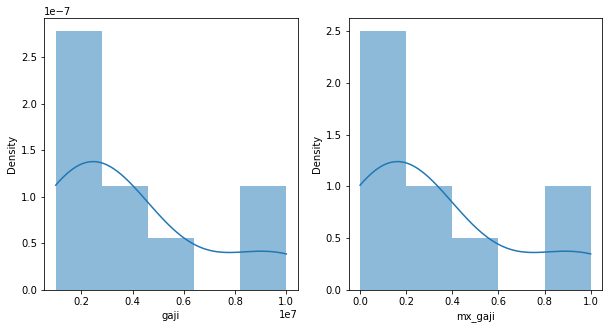

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['gaji'], kde=True, stat="density", linewidth=0, ax=axs[0])
sns.histplot(df['mx_gaji'], kde=True, stat="density", linewidth=0, ax=axs[1])
plt.show()

### Transform gaji feature using Standard Scaller

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
ss = StandardScaler()

In [140]:
df['ss_gaji'] = ss.fit_transform(df[['gaji']])
df.head()

,tanggal_lahir,gaji,jk_laki,jk_perempuan,mx_gaji,ss_gaji
0,1993-03-02,1000000,0.0,1.0,0.000000,-1.001779
1,1992-03-01,2000000,1.0,0.0,0.111111,-0.663911
2,2000-04-05,1350000,0.0,1.0,0.038889,-0.883525
3,1995-05-20,10000000,0.0,1.0,1.000000,2.039035
4,1994-04-23,3400000,0.0,1.0,0.266667,-0.190896


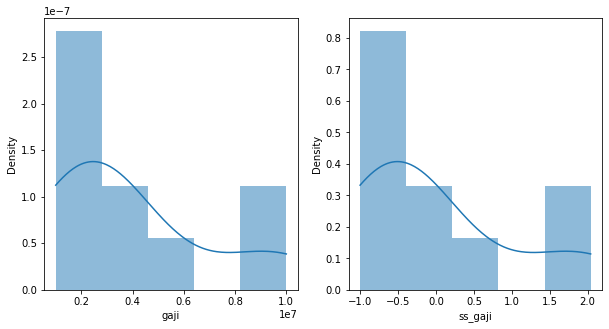

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['gaji'], kde=True, stat="density", linewidth=0, ax=axs[0])
sns.histplot(df['ss_gaji'], kde=True, stat="density", linewidth=0, ax=axs[1])
plt.show()

In [142]:
del df['gaji']
df.head()

,tanggal_lahir,jk_laki,jk_perempuan,mx_gaji,ss_gaji
0,1993-03-02,0.0,1.0,0.000000,-1.001779
1,1992-03-01,1.0,0.0,0.111111,-0.663911
2,2000-04-05,0.0,1.0,0.038889,-0.883525
3,1995-05-20,0.0,1.0,1.000000,2.039035
4,1994-04-23,0.0,1.0,0.266667,-0.190896
